In [2]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import r2_score
import xgboost
import math

Using TensorFlow backend.


In [3]:
# Load the dataset 

data = pd.read_csv('Auto.csv')

In [4]:
# Look at the first 5 rows

data.head()

,Year,Make,Model,Car Name,Wheel Drive,Colour,Odometer,Inv,VIN,Retail,Price
0,2002,Chrysler,Concorde LXi FWD,Chrysler Concorde,FWD,SILVER,245305,I,2C3HD36M32H196490,AUTO,1200
1,2004,Jeep,Liberty Limited 4WD,Jeep Liberty,4WD,black,205000,I,1J4GL58K74W203537,AUTO,1200
2,2005,Chevrolet,Malibu LS FWD,Chevrolet Malibu,FWD,WHITE,199885,I,1G1ZT52875F158217,AUTO,1200
3,2006,Ford,F-150 XLT 4x4,Ford F-150,4WD,Black Clearcoat,176880,I,1FTRW14W16KB59343,AUTO,0
4,2006,Nissan,Altima 2.5 S FWD,Nissan Altima,FWD,Blue,206598,I,1N4AL11D96C124803,AUTO,1200


In [5]:
# Look at the last 5 rows

data.tail()

,Year,Make,Model,Car Name,Wheel Drive,Colour,Odometer,Inv,VIN,Retail,Price
215,2019,Chevrolet,Spark LT FWD,Chevrolet Spark,FWD,Blue,32700,I,KL8CD6SA1KC776013,AUTO,14300
216,2019,Hyundai,Veloster 2.0 GL - RENTAL FWD,Hyundai Veloster,FWD,WHITE,47314,I,KMHTG6AF8KU008174,AUTO,16995
217,2019,Kia,Soul EX - RENTAL FWD,Kia Soul,FWD,WHITE,38790,I,KNDJP3A50K7909751,AUTO,17900
218,2019,Nissan,Micra S Rental FWD,Nissan Micra,FWD,Black,17836,I,3N1CK3CP6KL214890,AUTO,14700
219,2019,Nissan,Micra S - rental FWD,Nissan Micra,FWD,WHITE,20225,I,3N1CK3CP3KL217164,AUTO,14300


In [6]:
# Check out the number of rows and columns.

data.shape

(220, 11)

In [7]:
# Look at the information of all the features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 11 columns):
Year           220 non-null int64
Make           220 non-null object
Model          220 non-null object
Car Name       220 non-null object
Wheel Drive    220 non-null object
Colour         218 non-null object
Odometer       220 non-null int64
Inv            220 non-null object
VIN            220 non-null object
Retail         220 non-null object
Price          220 non-null int64
dtypes: int64(3), object(8)
memory usage: 19.0+ KB


In [8]:
# Check out the Dataset

data.describe()

,Year,Odometer,Price
count,220.000000,220.000000,220.000000
mean,2015.386364,70621.022727,16436.545455
std,2.356531,46718.323024,5045.752147
min,2002.000000,0.000000,0.000000
25%,2015.000000,47590.000000,13700.000000
50%,2016.000000,63728.000000,15995.000000
75%,2017.000000,81488.750000,19625.000000
max,2019.000000,494156.000000,30900.000000


# Data Cleaning 

In [9]:
# Check for null Values

data.isnull().sum()

Year           0
Make           0
Model          0
Car Name       0
Wheel Drive    0
Colour         2
Odometer       0
Inv            0
VIN            0
Retail         0
Price          0
dtype: int64

In [10]:
# Imputing null values by taking the mean values.

data['Colour'].fillna( method ='ffill', inplace = True)

In [11]:
# Again Check for null Values

data.isnull().sum()

Year           0
Make           0
Model          0
Car Name       0
Wheel Drive    0
Colour         0
Odometer       0
Inv            0
VIN            0
Retail         0
Price          0
dtype: int64

In [12]:
# Find the number of unique Model


data['Model'].nunique()

173

In [13]:
# Find the number of unique Car Name.

data['Car Name'].nunique()

82

In [14]:
# Find the number of unique Makers or Company.

data['Make'].nunique()

22

#  Data Visualization 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

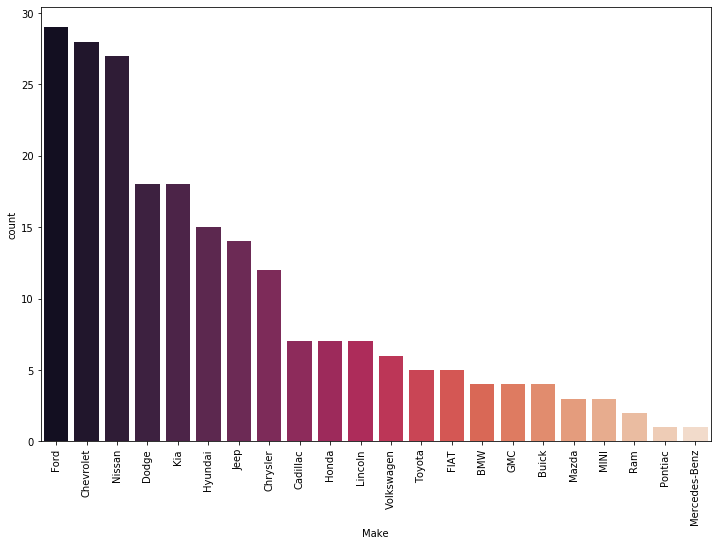

In [74]:
# Histogram for showing different Make. 

plt.figure(figsize = (12, 8))
plot = sns.countplot(x = data['Make'], data = data,palette="rocket",order = data['Make'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

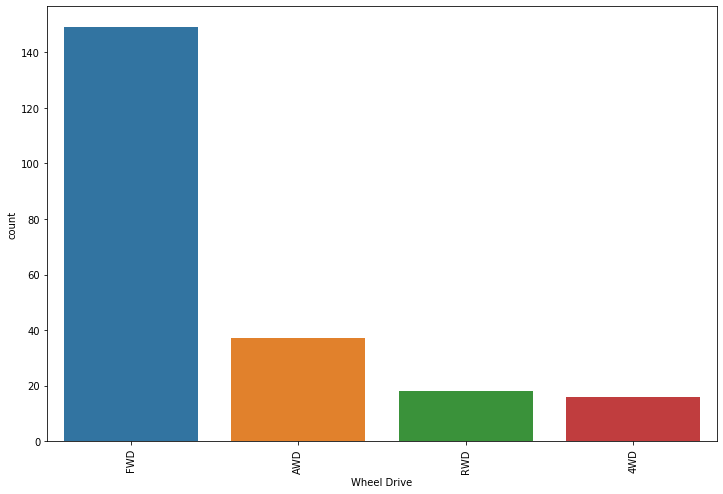

In [16]:
# Histogram for showing different Wheel Drive.

plt.figure(figsize = (12, 8))
plot = sns.countplot(x = data['Wheel Drive'], data = data,order = data['Wheel Drive'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

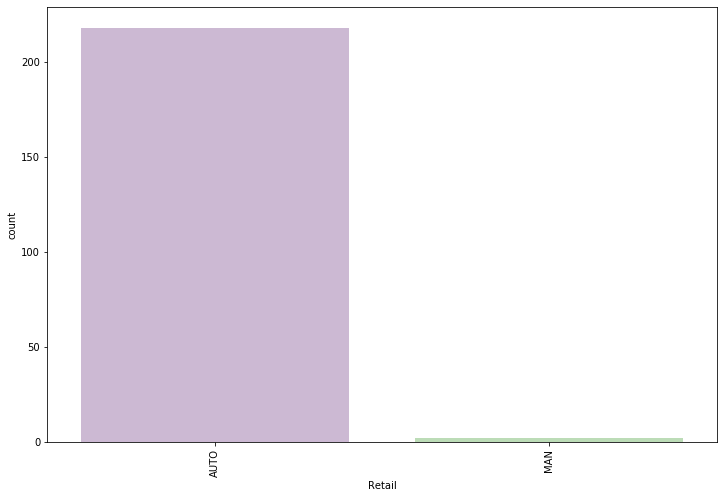

In [73]:
# Histogram for showing different Retail.

plt.figure(figsize = (12, 8))
plot = sns.countplot(x = data['Retail'], data = data,palette="PRGn",order = data['Retail'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

In [18]:
# Unique color names.

print("Color Names: " , data['Colour'].unique())

Color Names:  ['SILVER' 'black' 'WHITE' 'Black Clearcoat' 'Blue' 'Copper' 'silver'
 'Green' 'Black' 'BLACK' 'Red' 'White' 'Grey' 'Silver' 'Maroon'
 'Summit White' 'Yellow' 'GRAY' 'BROWN' 'P8163' 'Billet Metallic' 'GREY'
 'Brown' 'BLUE' 'Beige' 'RED' 'Cream' 'Gold' 'Black Cherry']


In [19]:
# Replacing all the similar colors.

data['Colour'].replace(to_replace =["silver"],  
                            value ="SILVER",inplace=True) 
data['Colour'].replace(to_replace =["Silver"],  
                            value ="SILVER",inplace=True)
data['Colour'].replace(to_replace =["black"],  
                            value ="BLACK",inplace=True) 
data['Colour'].replace(to_replace =["Black"],  
                            value ="BLACK",inplace=True) 
data['Colour'].replace(to_replace =["White"],  
                            value ="WHITE",inplace=True)
data['Colour'].replace(to_replace =["Blue"],  
                            value ="BLUE",inplace=True) 
data['Colour'].replace(to_replace =["Red"],  
                            value ="RED",inplace=True)
data['Colour'].replace(to_replace =["Grey"],  
                            value ="GREY",inplace=True)
data['Colour'].replace(to_replace =["GRAY"],  
                            value ="GREY",inplace=True)
data['Colour'].replace(to_replace =["Brown"],  
                            value ="BROWN",inplace=True)
data['Colour'].replace(to_replace =["P8163"],  
                            value ="GREY",inplace=True)

In [20]:
# Unique color names.

print("Color Names: " , data['Colour'].unique())

Color Names:  ['SILVER' 'BLACK' 'WHITE' 'Black Clearcoat' 'BLUE' 'Copper' 'Green' 'RED'
 'GREY' 'Maroon' 'Summit White' 'Yellow' 'BROWN' 'Billet Metallic' 'Beige'
 'Cream' 'Gold' 'Black Cherry']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

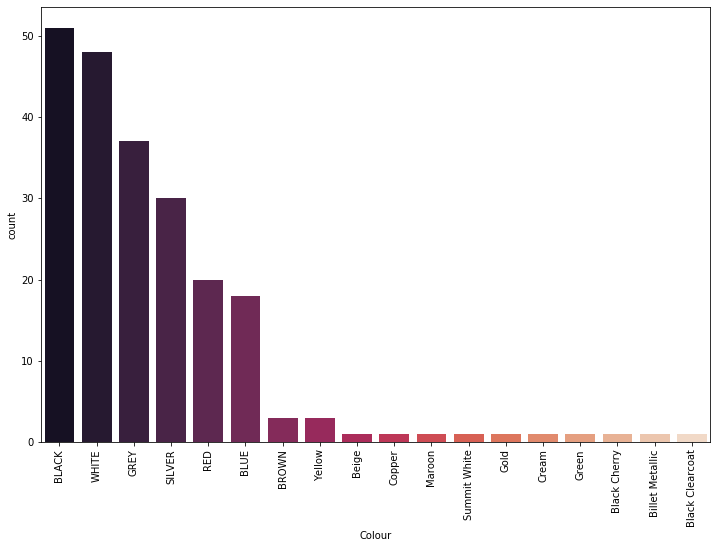

In [72]:
# Histogram for showing different Color. 


plt.figure(figsize = (12, 8))
plot = sns.countplot(x = data['Colour'], data = data,palette="rocket",order = data['Colour'].value_counts(ascending=False).index)
plt.xticks(rotation = 90)

In [22]:
# Drop columns which are of least importance.

cars = data.drop(['Make','Model','Inv','VIN',],axis=1)

In [23]:


cars.head()

,Year,Car Name,Wheel Drive,Colour,Odometer,Retail,Price
0,2002,Chrysler Concorde,FWD,SILVER,245305,AUTO,1200
1,2004,Jeep Liberty,4WD,BLACK,205000,AUTO,1200
2,2005,Chevrolet Malibu,FWD,WHITE,199885,AUTO,1200
3,2006,Ford F-150,4WD,Black Clearcoat,176880,AUTO,0
4,2006,Nissan Altima,FWD,BLUE,206598,AUTO,1200


In [24]:
# Create a new column showing the number of years. 

year = 2020
cars['No_of_Years'] = cars['Year'].apply(lambda x :year - x)
cars.drop('Year',axis=1)

,Car Name,Wheel Drive,Colour,Odometer,Retail,Price,No_of_Years
0,Chrysler Concorde,FWD,SILVER,245305,AUTO,1200,18
1,Jeep Liberty,4WD,BLACK,205000,AUTO,1200,16
2,Chevrolet Malibu,FWD,WHITE,199885,AUTO,1200,15
3,Ford F-150,4WD,Black Clearcoat,176880,AUTO,0,14
4,Nissan Altima,FWD,BLUE,206598,AUTO,1200,14
...,...,...,...,...,...,...,...
215,Chevrolet Spark,FWD,BLUE,32700,AUTO,14300,1
216,Hyundai Veloster,FWD,WHITE,47314,AUTO,16995,1
217,Kia Soul,FWD,WHITE,38790,AUTO,17900,1
218,Nissan Micra,FWD,BLACK,17836,AUTO,14700,1


In [25]:
# Convert the categorical values into dummies using the get_dummies function  


df=pd.get_dummies(cars['Car Name'])
cars=pd.concat([cars,df.iloc[:,:-1]],axis=1)
cars.drop(['Car Name'],axis=1,inplace=True)
df=pd.get_dummies(cars['Wheel Drive'])
cars=pd.concat([cars,df.iloc[:,:-1]],axis=1)
cars.drop(['Wheel Drive'],axis=1,inplace=True)
df=pd.get_dummies(cars['Colour'])
cars=pd.concat([cars,df.iloc[:,:-1]],axis=1)
cars.drop(['Colour'],axis=1,inplace=True)
df=pd.get_dummies(cars['Retail'])
cars=pd.concat([cars,df.iloc[:,:-1]],axis=1)
cars.drop(['Retail'],axis=1,inplace=True)

In [26]:
# Drop the Year Column 

cars.drop(['Year'],axis=1,inplace=True)
cars.head()

,Odometer,Price,No_of_Years,BMW 3,BMW X3,Buick Encore,Buick Regal,Buick Verano,Cadillac ATS,Cadillac SRX,...,Cream,GREY,Gold,Green,Maroon,RED,SILVER,Summit White,WHITE,AUTO
0,245305,1200,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,205000,1200,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,199885,1200,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,176880,0,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,206598,1200,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Model Building 

#### We will be making Y as the target variable by only passing the Price column from the original data

In [27]:
X = cars.drop('Price',axis=1)
Y = cars['Price']

In [28]:
X.head()

,Odometer,No_of_Years,BMW 3,BMW X3,Buick Encore,Buick Regal,Buick Verano,Cadillac ATS,Cadillac SRX,Cadillac XTS,...,Cream,GREY,Gold,Green,Maroon,RED,SILVER,Summit White,WHITE,AUTO
0,245305,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,205000,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,199885,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,176880,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,206598,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
Y.head()

0    1200
1    1200
2    1200
3       0
4    1200
Name: Price, dtype: int64

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state = 0)

In [31]:
# Scaling the Train and Test data using Minmax Scaler

minma = MinMaxScaler()
minma.fit(X_train)
X_train = minma.transform(X_train)
X_test = minma.transform(X_test)

# Random Forest Regressor

In [32]:
rf_reg = RandomForestRegressor(n_estimators=200)
rf_reg.fit(X_train,y_train)
train_pred = rf_reg.predict(X_train)
test_pred=rf_reg.predict(X_test)
print("Accuracy for Test set: "+"{:.2f}".format(rf_reg.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(rf_reg.score(X_train,y_train)))

Accuracy for Test set: 0.73
Accuracy for Training set: 0.96


In [33]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 4.7
Tree on test set MAE%: 12.2


In [34]:
# Print the root mean square error value.

math.sqrt(mean_squared_error(y_test,test_pred))

2745.988723510147

# Decision Tree Regressor

In [35]:
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train,y_train)
train_pred = dec_reg.predict(X_train)
test_pred=dec_reg.predict(X_test)
print("Accuracy for Test set: "+"{:.2f}".format(dec_reg.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(dec_reg.score(X_train,y_train)))

Accuracy for Test set: 0.54
Accuracy for Training set: 1.00


In [36]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 0.0
Tree on test set MAE%: 16.0


In [37]:
# Print the root mean square error value.

math.sqrt(mean_squared_error(y_test,test_pred))

3567.741359612676

# Linear Regression

In [38]:
reg = LinearRegression()
reg = reg.fit(X_train,y_train)
train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)
print("Accuracy for Test set: "+"{:.2f}".format(reg.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(reg.score(X_train,y_train)))

Accuracy for Test set: -790058709270002982191104.00
Accuracy for Training set: 0.94


In [39]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 5.2
Tree on test set MAE%: 6782234639112.4


In [40]:
# Print the root mean square error value.

math.sqrt(mean_squared_error(y_test,test_pred))

4695386783326496.0

# K Neighbor Regressor

In [41]:
k_reg=KNeighborsRegressor()
k_reg = k_reg.fit(X_train,y_train)
train_pred = k_reg.predict(X_train)
test_pred=k_reg.predict(X_test)
print("Accuracy for Test set: "+"{:.2f}".format(k_reg.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(k_reg.score(X_train,y_train)))

Accuracy for Test set: 0.54
Accuracy for Training set: 0.58


In [42]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 14.2
Tree on test set MAE%: 16.3


In [43]:
# Print the root mean square error value.

math.sqrt(mean_squared_error(y_test,test_pred))

3595.8954757789156

# Gradient Boosting Regressor

In [44]:
gb_reg = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=300,
                                random_state=10)
gb_reg.fit(X_train,y_train)
train_pred = gb_reg.predict(X_train)
test_pred=gb_reg.predict(X_test)
print("Accuracy for Test set: "+"{:.2f}".format(gb_reg.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(gb_reg.score(X_train,y_train)))

Accuracy for Test set: 0.44
Accuracy for Training set: 0.57


In [45]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 15.2
Tree on test set MAE%: 18.2


In [46]:
# Print the root mean square error value.

math.sqrt(mean_squared_error(y_test,test_pred))

3935.6608373117283

# Artificial Neural Network (keras)

In [66]:
np.random.seed(1337)
model = Sequential()
model.add(Dense(200,activation='relu',input_dim=104))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

In [67]:
model.compile(optimizer ='adam', loss='mse')
model.fit(X_train, y_train, epochs=2000,batch_size=16,shuffle=False)

Epoch 1/2000
176/176 [==============================] - 0s 2ms/step - loss: 290603706.1818
Epoch 2/2000
176/176 [==============================] - 0s 213us/step - loss: 290548891.6364
Epoch 3/2000
176/176 [==============================] - 0s 213us/step - loss: 290454304.0000
Epoch 4/2000
176/176 [==============================] - 0s 195us/step - loss: 290275240.7273
Epoch 5/2000
176/176 [==============================] - 0s 195us/step - loss: 289972011.6364
Epoch 6/2000
176/176 [==============================] - 0s 178us/step - loss: 289456043.6364
Epoch 7/2000
176/176 [==============================] - 0s 189us/step - loss: 288665592.7273
Epoch 8/2000
176/176 [==============================] - 0s 192us/step - loss: 287507179.6364
Epoch 9/2000
176/176 [==============================] - 0s 179us/step - loss: 285899261.0909
Epoch 10/2000
176/176 [==============================] - 0s 184us/step - loss: 283802808.7273
Epoch 11/2000
176/176 [==============================] - 0s 178us/step 

176/176 [==============================] - 0s 168us/step - loss: 12588650.7273
Epoch 176/2000
176/176 [==============================] - 0s 175us/step - loss: 10694585.5682
Epoch 177/2000
176/176 [==============================] - 0s 181us/step - loss: 10320939.3182
Epoch 178/2000
176/176 [==============================] - 0s 178us/step - loss: 10870677.3182
Epoch 179/2000
176/176 [==============================] - 0s 176us/step - loss: 10839220.9773
Epoch 180/2000
176/176 [==============================] - 0s 189us/step - loss: 11045789.3636
Epoch 181/2000
176/176 [==============================] - 0s 164us/step - loss: 10337755.5909
Epoch 182/2000
176/176 [==============================] - 0s 179us/step - loss: 10768299.1364
Epoch 183/2000
176/176 [==============================] - 0s 181us/step - loss: 12118056.7273
Epoch 184/2000
176/176 [==============================] - 0s 179us/step - loss: 10257292.9545
Epoch 185/2000
176/176 [==============================] - 0s 199us/step - l

176/176 [==============================] - 0s 167us/step - loss: 6630091.3636
Epoch 264/2000
176/176 [==============================] - 0s 182us/step - loss: 5576549.7273
Epoch 265/2000
176/176 [==============================] - 0s 203us/step - loss: 6148811.9545
Epoch 266/2000
176/176 [==============================] - 0s 342us/step - loss: 6210342.6818
Epoch 267/2000
176/176 [==============================] - 0s 322us/step - loss: 6178910.7727
Epoch 268/2000
176/176 [==============================] - 0s 344us/step - loss: 5534490.8864
Epoch 269/2000
176/176 [==============================] - 0s 317us/step - loss: 6430750.1818
Epoch 270/2000
176/176 [==============================] - 0s 324us/step - loss: 6277442.5455
Epoch 271/2000
176/176 [==============================] - 0s 307us/step - loss: 6512688.1818
Epoch 272/2000
176/176 [==============================] - 0s 315us/step - loss: 5972747.0909
Epoch 273/2000
176/176 [==============================] - 0s 356us/step - loss: 61996

176/176 [==============================] - 0s 148us/step - loss: 4183829.2500
Epoch 440/2000
176/176 [==============================] - 0s 167us/step - loss: 4473884.3409
Epoch 441/2000
176/176 [==============================] - 0s 186us/step - loss: 4147596.0000
Epoch 442/2000
176/176 [==============================] - 0s 181us/step - loss: 4078261.2500
Epoch 443/2000
176/176 [==============================] - 0s 194us/step - loss: 4859910.0227
Epoch 444/2000
176/176 [==============================] - 0s 214us/step - loss: 3687508.0000
Epoch 445/2000
176/176 [==============================] - 0s 211us/step - loss: 4461012.6761
Epoch 446/2000
176/176 [==============================] - 0s 233us/step - loss: 4543501.6591
Epoch 447/2000
176/176 [==============================] - 0s 177us/step - loss: 4411093.4091
Epoch 448/2000
176/176 [==============================] - 0s 196us/step - loss: 3734774.7500
Epoch 449/2000
176/176 [==============================] - 0s 188us/step - loss: 45104

176/176 [==============================] - 0s 218us/step - loss: 4311439.2841
Epoch 616/2000
176/176 [==============================] - 0s 150us/step - loss: 4190878.3409
Epoch 617/2000
176/176 [==============================] - 0s 174us/step - loss: 3895304.2727
Epoch 618/2000
176/176 [==============================] - 0s 160us/step - loss: 3999765.4659
Epoch 619/2000
176/176 [==============================] - 0s 173us/step - loss: 3457472.4318
Epoch 620/2000
176/176 [==============================] - 0s 189us/step - loss: 4093663.6364
Epoch 621/2000
176/176 [==============================] - 0s 189us/step - loss: 4007417.9773
Epoch 622/2000
176/176 [==============================] - 0s 179us/step - loss: 3952162.1136
Epoch 623/2000
176/176 [==============================] - 0s 200us/step - loss: 3641482.2727
Epoch 624/2000
176/176 [==============================] - 0s 179us/step - loss: 3750130.0455
Epoch 625/2000
176/176 [==============================] - 0s 195us/step - loss: 34180

Epoch 703/2000
176/176 [==============================] - 0s 197us/step - loss: 3829112.8409
Epoch 704/2000
176/176 [==============================] - 0s 191us/step - loss: 4099029.5227
Epoch 705/2000
176/176 [==============================] - 0s 197us/step - loss: 3899646.6364
Epoch 706/2000
176/176 [==============================] - 0s 168us/step - loss: 3681059.6705
Epoch 707/2000
176/176 [==============================] - 0s 178us/step - loss: 3114540.3750
Epoch 708/2000
176/176 [==============================] - 0s 188us/step - loss: 4045572.0682
Epoch 709/2000
176/176 [==============================] - 0s 174us/step - loss: 4376511.6818
Epoch 710/2000
176/176 [==============================] - 0s 156us/step - loss: 3316642.3295
Epoch 711/2000
176/176 [==============================] - 0s 178us/step - loss: 3657267.5682
Epoch 712/2000
176/176 [==============================] - 0s 186us/step - loss: 3611100.0000
Epoch 713/2000
176/176 [==============================] - 0s 182us/ste

176/176 [==============================] - 0s 188us/step - loss: 3620071.8864
Epoch 792/2000
176/176 [==============================] - 0s 205us/step - loss: 3619617.6932
Epoch 793/2000
176/176 [==============================] - 0s 212us/step - loss: 3746313.2273
Epoch 794/2000
176/176 [==============================] - 0s 170us/step - loss: 3544527.1023
Epoch 795/2000
176/176 [==============================] - 0s 187us/step - loss: 3553135.2841
Epoch 796/2000
176/176 [==============================] - 0s 167us/step - loss: 3370137.3977
Epoch 797/2000
176/176 [==============================] - 0s 178us/step - loss: 3377567.0000
Epoch 798/2000
176/176 [==============================] - 0s 183us/step - loss: 4411685.1477
Epoch 799/2000
176/176 [==============================] - 0s 190us/step - loss: 3822873.2955
Epoch 800/2000
176/176 [==============================] - 0s 179us/step - loss: 3971879.2955
Epoch 801/2000
176/176 [==============================] - 0s 200us/step - loss: 33557

176/176 [==============================] - 0s 190us/step - loss: 3507204.6818
Epoch 968/2000
176/176 [==============================] - 0s 219us/step - loss: 3266695.0341
Epoch 969/2000
176/176 [==============================] - 0s 166us/step - loss: 3775120.1250
Epoch 970/2000
176/176 [==============================] - 0s 177us/step - loss: 4502502.3182
Epoch 971/2000
176/176 [==============================] - 0s 211us/step - loss: 3864383.3977
Epoch 972/2000
176/176 [==============================] - 0s 205us/step - loss: 4171961.7273
Epoch 973/2000
176/176 [==============================] - 0s 220us/step - loss: 3484144.0455
Epoch 974/2000
176/176 [==============================] - 0s 237us/step - loss: 4915450.3977
Epoch 975/2000
176/176 [==============================] - 0s 214us/step - loss: 3407721.2045
Epoch 976/2000
176/176 [==============================] - 0s 216us/step - loss: 3893013.3409
Epoch 977/2000
176/176 [==============================] - 0s 231us/step - loss: 33254

176/176 [==============================] - 0s 203us/step - loss: 3666180.4091
Epoch 1142/2000
176/176 [==============================] - 0s 211us/step - loss: 3858840.0455
Epoch 1143/2000
176/176 [==============================] - 0s 204us/step - loss: 4074820.8750
Epoch 1144/2000
176/176 [==============================] - 0s 183us/step - loss: 3603555.8636
Epoch 1145/2000
176/176 [==============================] - 0s 190us/step - loss: 3823799.5000
Epoch 1146/2000
176/176 [==============================] - 0s 195us/step - loss: 3726243.6364
Epoch 1147/2000
176/176 [==============================] - 0s 226us/step - loss: 3925928.5909
Epoch 1148/2000
176/176 [==============================] - 0s 207us/step - loss: 4656351.4773
Epoch 1149/2000
176/176 [==============================] - 0s 219us/step - loss: 3563686.9773
Epoch 1150/2000
176/176 [==============================] - 0s 193us/step - loss: 3283261.6591
Epoch 1151/2000
176/176 [==============================] - 0s 199us/step - l

176/176 [==============================] - 0s 200us/step - loss: 3754893.3636
Epoch 1316/2000
176/176 [==============================] - 0s 215us/step - loss: 3510114.5455
Epoch 1317/2000
176/176 [==============================] - 0s 227us/step - loss: 3337530.5000
Epoch 1318/2000
176/176 [==============================] - 0s 230us/step - loss: 3816290.2500
Epoch 1319/2000
176/176 [==============================] - 0s 183us/step - loss: 3248673.4545
Epoch 1320/2000
176/176 [==============================] - 0s 206us/step - loss: 3489947.2045
Epoch 1321/2000
176/176 [==============================] - 0s 206us/step - loss: 3366085.3864
Epoch 1322/2000
176/176 [==============================] - 0s 173us/step - loss: 3551620.0682
Epoch 1323/2000
176/176 [==============================] - 0s 182us/step - loss: 3554289.0795
Epoch 1324/2000
176/176 [==============================] - 0s 262us/step - loss: 3693433.5341
Epoch 1325/2000
176/176 [==============================] - 0s 363us/step - l

176/176 [==============================] - 0s 174us/step - loss: 3801934.4091
Epoch 1403/2000
176/176 [==============================] - 0s 178us/step - loss: 3767948.5682
Epoch 1404/2000
176/176 [==============================] - 0s 205us/step - loss: 4102782.6818
Epoch 1405/2000
176/176 [==============================] - 0s 156us/step - loss: 3911474.0455
Epoch 1406/2000
176/176 [==============================] - 0s 188us/step - loss: 3785649.0227
Epoch 1407/2000
176/176 [==============================] - 0s 230us/step - loss: 3138371.0455
Epoch 1408/2000
176/176 [==============================] - 0s 192us/step - loss: 3420051.9773
Epoch 1409/2000
176/176 [==============================] - 0s 200us/step - loss: 3579089.0795
Epoch 1410/2000
176/176 [==============================] - 0s 197us/step - loss: 4076675.5227
Epoch 1411/2000
176/176 [==============================] - 0s 202us/step - loss: 3425686.3182
Epoch 1412/2000
176/176 [==============================] - 0s 124us/step - l

176/176 [==============================] - 0s 217us/step - loss: 3789065.8409
Epoch 1577/2000
176/176 [==============================] - 0s 209us/step - loss: 3659088.3864
Epoch 1578/2000
176/176 [==============================] - 0s 207us/step - loss: 3934459.2727
Epoch 1579/2000
176/176 [==============================] - 0s 197us/step - loss: 3302353.4545
Epoch 1580/2000
176/176 [==============================] - 0s 191us/step - loss: 4233785.1591
Epoch 1581/2000
176/176 [==============================] - 0s 210us/step - loss: 3288278.9318
Epoch 1582/2000
176/176 [==============================] - 0s 183us/step - loss: 3538570.3409
Epoch 1583/2000
176/176 [==============================] - 0s 202us/step - loss: 3942371.6477
Epoch 1584/2000
176/176 [==============================] - 0s 176us/step - loss: 3093135.2500
Epoch 1585/2000
176/176 [==============================] - 0s 186us/step - loss: 3551065.3864
Epoch 1586/2000
176/176 [==============================] - 0s 195us/step - l

176/176 [==============================] - 0s 172us/step - loss: 3684800.8068
Epoch 1751/2000
176/176 [==============================] - 0s 165us/step - loss: 3396377.3977
Epoch 1752/2000
176/176 [==============================] - 0s 177us/step - loss: 4329633.6136
Epoch 1753/2000
176/176 [==============================] - 0s 184us/step - loss: 3578489.9318
Epoch 1754/2000
176/176 [==============================] - 0s 189us/step - loss: 3393957.2955
Epoch 1755/2000
176/176 [==============================] - 0s 186us/step - loss: 4045579.1705
Epoch 1756/2000
176/176 [==============================] - 0s 174us/step - loss: 3357638.8409
Epoch 1757/2000
176/176 [==============================] - 0s 192us/step - loss: 3433263.5909
Epoch 1758/2000
176/176 [==============================] - 0s 188us/step - loss: 3540546.4545
Epoch 1759/2000
176/176 [==============================] - 0s 201us/step - loss: 4147025.9773
Epoch 1760/2000
176/176 [==============================] - 0s 163us/step - l

176/176 [==============================] - 0s 204us/step - loss: 3687443.5227
Epoch 1925/2000
176/176 [==============================] - 0s 196us/step - loss: 4124277.4773
Epoch 1926/2000
176/176 [==============================] - 0s 176us/step - loss: 3642761.4773
Epoch 1927/2000
176/176 [==============================] - 0s 184us/step - loss: 3704136.1364
Epoch 1928/2000
176/176 [==============================] - 0s 197us/step - loss: 3730593.5455
Epoch 1929/2000
176/176 [==============================] - 0s 299us/step - loss: 3882928.0114
Epoch 1930/2000
176/176 [==============================] - 0s 427us/step - loss: 2617095.6591
Epoch 1931/2000
176/176 [==============================] - 0s 303us/step - loss: 3619578.0909
Epoch 1932/2000
176/176 [==============================] - 0s 432us/step - loss: 4249645.1136
Epoch 1933/2000
176/176 [==============================] - 0s 386us/step - loss: 3673601.5909
Epoch 1934/2000
176/176 [==============================] - 0s 405us/step - l

In [68]:
test_pred = model.predict(X_test)
train_pred= model.predict(X_train)
test_u =test_pred.flatten()
test_u
train_u = train_pred.flatten()

In [69]:
print("Accuracy for Test set: "+"{:.2f}".format(r2_score(y_test,test_u)))
print("Accuracy for Training set: "+"{:.2f}".format(r2_score(y_train,train_u)))

Accuracy for Test set: 0.74
Accuracy for Training set: 0.94


In [70]:
MAE_train=np.mean(abs(y_train-train_u))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_u))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 5.6
Tree on test set MAE%: 12.1


In [71]:
# Print the root mean square error value.

math.sqrt(mean_squared_error(y_test,test_u))

2705.4700172946823

# XGBoost Regressor with K = 5 

In [53]:
# Define the grid of hyperparameters to search

parameter_grid = {
    'base_score':[0.25,0.5,0.75,1],
    'n_estimators':[100, 500, 700, 1000, 1500] ,
    'max_depth':[2, 3, 5, 9],
    'learning_rate':[0.05,0.1,0.15,0.20],
    'min_child_weight':[1,2,3,4],
    'booster':['gbtree','gblinear'] ,
    }

In [54]:
regressor=xgboost.XGBRegressor()
ran = RandomizedSearchCV(estimator=regressor,
            param_distributions=parameter_grid,cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5,
            return_train_score = True,
            random_state=35)

In [55]:
ran.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   11.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   18.6s
[Parallel(n_jobs=4)]: Done 196 tasks      | elapsed:   36.0s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   45.5s finished
C:\Users\amith\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\amith\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:55:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [56]:
# Find out the best estimator

ran.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=700,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [57]:
# Run the model by passing the best estimator from the GridSearchCV method.


regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=700,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [58]:
regressor.fit(X_train,y_train)


[23:55:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=700,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [59]:
train_pred = regressor.predict(X_train)
test_pred=regressor.predict(X_test)

In [60]:
y_test.head()

152    19900
74     14995
71     12995
161    15300
162    23400
Name: Price, dtype: int64

In [61]:
print("Accuracy for Test set: "+"{:.2f}".format(regressor.score(X_test,y_test)))
print("Accuracy for Training set: "+"{:.2f}".format(regressor.score(X_train,y_train)))

Accuracy for Test set: 0.76
Accuracy for Training set: 0.98


In [62]:
MAE_train=np.mean(abs(y_train-train_pred))/np.mean(y_train)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(y_test-test_pred))/np.mean(y_test)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 3.1
Tree on test set MAE%: 11.8


In [63]:
# Print the root mean square error value.

math.sqrt(mean_squared_error(y_test,test_pred))

2612.2167251606866